   school  test_score  number_of_students
0      26        39.0                 965
1      54        64.0                1483
2     356        64.0                1055
3     108        68.0                1806
4     298        78.0                 971
['test_score']
        school  test_score  number_of_students
0           26        39.0                 965
1           54        64.0                1483
2          356        64.0                1055
3          108        68.0                1806
4          298        78.0                 971
...        ...         ...                 ...
501557      52        65.0                1361
501558     412        37.0                1032
501559     165        80.0                 974
501560     426        47.0                 899
501561      76        50.0                 872

[501358 rows x 3 columns]
              school     test_score  number_of_students
count  501358.000000  501358.000000       501358.000000
mean      250.096795      51.6

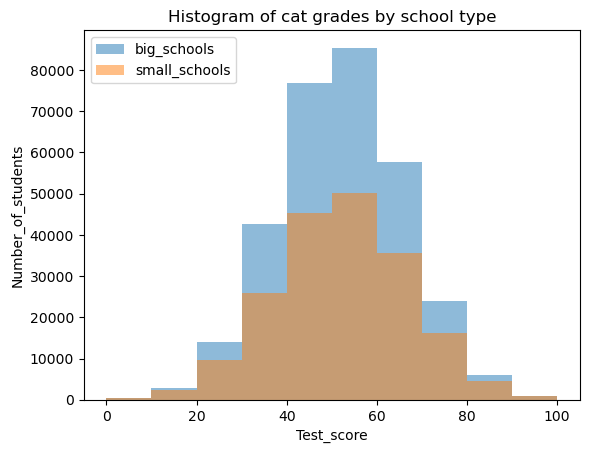

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import typing as tp
from matplotlib.axes import Axes


class CatExam:
    # Загрузка датасета с результатами экзамена котиков.
    def __init__(self, path_to_df: str="cat_exam_data.csv"): # task0
        self.df = pd.read_csv(path_to_df, delimiter=',')
    
    # Выводятся первые 5 строк таблицы с результатами экзамена котиков.
    def task1(self) -> pd.DataFrame:
        return self.df.head(5)
    
    # Находим список из названий колонок таблицы, в которых есть пропуски.
    def task2(self) -> tp.List[str]:
        columns = self.df.columns
        bad_columns=[] # колонки с пропусками
        for i in range(0, len(columns)):
            #В колонке есть пропуски, если доля пропущенных значений в этой колонке не равна 0
            if(self.df.isna().mean()[i]!=0):
                bad_columns.append(columns[i])
        return bad_columns

    # Удаляем строки таблицы, в которых есть пропуски.
    def task3(self) -> pd.DataFrame:
        data_without_gaps=self.df.dropna()
        return data_without_gaps
    
    # Считаем описательные статистики (среднее, мин, макс, и тд.) по колонкам в таблице.
    def task4(self) -> pd.DataFrame:
        return self.task3().describe()
    
    # Считаем количество котиков, которые получили 100 баллов.
    def task5(self) -> int:
        return len(self.task3()[self.task3().test_score == 100])
    
    # Выводим подробную информацию о школах, где есть хотя бы один котик, получивший 100 баллов на ЕКЭ. 
    # Сортируем эти школы по количеству стобалльников и номеру школы в порядке убывания.
    def task6(self) -> pd.DataFrame:
        data_100=self.task3()[self.task3().test_score == 100]
        data_100_schools=data_100['school'].array # школы со 100-балльниками 
        # кол-во людей в школах со 100-балльниками в том же порядке
        data_100_number_of_students=data_100['number_of_students'].array
        
        unique_100_schools=[] # ищем уникальные школы со 100-балльниками
        for k in range(0, len(data_100_schools)):
            if(unique_100_schools.count(data_100_schools[k])==0):
                unique_100_schools.append(data_100_schools[k])
                
        # готовим новую таблицу для ответа
        answ = pd.DataFrame(data={'school': unique_100_schools, 'number_of_students': [0] * len(unique_100_schools),
                                  'cnt_100': [0] * len(unique_100_schools)})
        
        # заполняем колонки 'number_of_students' и 'cnt_100' в таблице ответа
        for m in range(0, len(data_100_schools)):
            for n in range(0, len(unique_100_schools)):
                if(data_100_schools[m]==unique_100_schools[n]):
                    answ.at[n, 'cnt_100'] = answ.at[n, 'cnt_100']+1
                    answ.at[n, 'number_of_students'] =data_100_number_of_students[m]
                    
        #Сортируем 10-балльные школы по количеству стобалльников и номеру школы в порядке убывания. 
        sorted_answ=answ.sort_values(by=['cnt_100','school'],ascending=False)
        return sorted_answ

    # Считаем средний результат каждой из школ. Рассматриваем все школы, не только со стобальниками.
    # Сортируем школы по среднему результату и смотрим на топ 10 лучших школ по этому параметру.
    def task7(self) -> pd.DataFrame:
        sorted_average_data=self.task3().groupby(by='school').mean().sort_values(by='test_score',ascending=False)
        top10_sorted_schools=sorted_average_data[0:10] # смотрим на топ 10 лучших школ по среднему баллу
        top10_sorted_schools=top10_sorted_schools.reset_index() # индекс 'school' опять делаем колонкой
        return top10_sorted_schools

    # Считаем средний результат каждой из школ. Рассматриваем все школы, не только со стобальниками.
    # Сортируем школы по среднему результату и смотрим на 10 худших школ по этому параметру.
    # Ожидаем, что внизу рейтинга будут только большие школы.
    def task8(self) -> pd.DataFrame:
        sorted_average_data=self.task3().groupby(by='school').mean().sort_values(by='test_score',ascending=True)
        bad_top10_sorted_schools=sorted_average_data[0:10] # смотрим на топ 10 худших школ по среднему баллу
        bad_top10_sorted_schools=bad_top10_sorted_schools.reset_index() # индекс 'school' опять делаем колонкой
        return bad_top10_sorted_schools
    # Мы ожидали, что внизу рейтинга будут только большие школы. Среднее количество учеников по всем школам примерно равно 1088.
    # Оказалось, что 2 худшие школы имеют достаточно маленькое количество учеников (336 и 351).
    # Также 9 из 10 самых худших школ имеют достаточно маленькое количество учеников,
    # меньшее среднего количество учеников по всем школам.
    # Оказалось, что внизу рейтинга нет ни одной большие школы. Наша гипотеза оказалась не верна.
    # Интересно, что в 486 школе оказалось 2 100-балльника, но школа оказалась на дне рейтинга по среднему баллу всех учеников.
    # Средний балл по всем школам колеблется от 50.05 до 53.34, что достаточно мало

    # Группируем учеников в зависимости от типа школы, получив тем самым два датасета.
    # Считаем, что школа небольшая, если в ней не более 1000 учеников.
    # Строим гистограммы оценок этих двух выборок на одном графике, установив параметры:
    # bins=10 − число бинов гистограммы; alpha=0.5 − прозрачность бинов; 
    # Оси и сам график должны быть подписаны, должна быть легенда, которая различает две гистограммы.
    # Функция должна вернуть matplotlib.axes.Axes, на котором рисовался график (в шаблоне возвращаемое значение уже есть).
    # Вызывать plt.show() нельзя, этот метод сбрасывает текущий холст.
    def task9(self) -> Axes:
        # Группируем учеников в зависимости от типа школы.
        small_schools=self.task3()[self.task3().number_of_students <= 1000]
        big_schools=self.task3()[self.task3().number_of_students > 1000]

        # Строим гистограмму.
        plt.hist(data=big_schools, x='test_score', bins=10, alpha = 0.5, label='big_schools')
        plt.hist(data=small_schools, x='test_score', bins=10, alpha = 0.5, label='small_schools')
        plt.legend(loc='upper left')
        plt.title("Histogram of cat grades by school type")
        plt.xlabel("Test_score")
        plt.ylabel("Number_of_students")
        return plt.gca()

new_cat = CatExam()
print(new_cat.task1())
print(new_cat.task2())
print(new_cat.task3())
print(new_cat.task4())
print(new_cat.task5())
print(new_cat.task6())
print(new_cat.task7())
print(new_cat.task8())
print(new_cat.task9())